<h1><b><font size = 10>Chatbot using Python Phase-3</font></b></h1>

<h1><b><font size = 5>Setting Up The Environment</font></b></h1>

<h1><b><font size = 3>Using GPT-3</font></b></h1>

The GPT-3 integration environment is a Python setup that leverages the OpenAI GPT-3 API for chatbot development. It enables developers to send text prompts to GPT-3, receive generated responses, and seamlessly integrate them into chatbot logic. The environment involves API key configuration, library installation, and fine-tuning for tailored chatbot interactions. It empowers chatbots to provide contextually relevant, human-like responses to user queries.

<h1><b><font size = 3>Creating a Flask Environment for the Chatbot</font></b></h1>

The Flask app's routes are the endpoints that guide the behavior of a web application. In the context of a chatbot, the routes are configured to create a user-friendly website where users can interact with the chatbot. For example, there's a route for displaying the chat interface and another for handling chatbot responses. When a user accesses the website, they see a chatbox for input. When they send a message, the input is processed, a chatbot response is generated, and the response is displayed within the chat interface. This interaction is facilitated through these Flask routes, enabling seamless communication between the user and the chatbot via a web interface.

Flask App :

Web Interface :

Finally to execute the chat app simply run

<h1><b><font size = 5>Processing the Datatset</font></b></h1>

Chatbots have become increasingly popular for automating customer support, answering user queries, and engaging in conversations. To harness the power of a chatbot effectively, it is essential to start with a well-structured and analyzed dataset. In this essay, I will walk you through the initial steps of exploring and preprocessing a chatbot dataset, setting the stage for more advanced analysis and model development.



The journey begins with the acquisition of the dataset, which is the lifeblood of any data-driven project. My chatbot dataset, carefully gathered and anonymized, was ready for its transformation into actionable insights. Leveraging Python's powerful data manipulation libraries, I loaded the dataset using the Pandas library. The dataset featured two main columns: "questions" and "answers," representing user queries and chatbot responses, respectively.

In [107]:
import numpy as np 
import string
from nltk.corpus import stopwords
import pandas as pd 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer
from sklearn.pipeline import Pipeline

In [108]:
df = pd.read_csv('dialogs.txt',sep='\t')
a = pd.Series(df.columns)
df

,"hi, how are you doing?",i'm fine. how about yourself?
0,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
1,i'm pretty good. thanks for asking.,no problem. so how have you been?
2,no problem. so how have you been?,i've been great. what about you?
3,i've been great. what about you?,i've been good. i'm in school right now.
4,i've been good. i'm in school right now.,what school do you go to?
...,...,...
3719,that's a good question. maybe it's not old age.,are you right-handed?
3720,are you right-handed?,yes. all my life.
3721,yes. all my life.,you're wearing out your right hand. stop using...
3722,you're wearing out your right hand. stop using...,but i do all my writing with my right hand.


For clarity and consistency, I updated the column titles.These updated titles serve as descriptive labels for their respective contents, facilitating easier reference and analysis.

In [109]:
a = a.rename({0: df.columns[0],1: df.columns[1]})
df = df.append(a,ignore_index=True)
df.columns=['Questions','Answers']
df

<ipython-input-109-d4d7f3e5d839>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(a,ignore_index=True)


,Questions,Answers
0,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
1,i'm pretty good. thanks for asking.,no problem. so how have you been?
2,no problem. so how have you been?,i've been great. what about you?
3,i've been great. what about you?,i've been good. i'm in school right now.
4,i've been good. i'm in school right now.,what school do you go to?
...,...,...
3720,are you right-handed?,yes. all my life.
3721,yes. all my life.,you're wearing out your right hand. stop using...
3722,you're wearing out your right hand. stop using...,but i do all my writing with my right hand.
3723,but i do all my writing with my right hand.,start typing instead. that way your left hand ...



The cleaner function processes a text input by removing punctuation, converting the text to lowercase, and splitting it into a list of words, making the text data suitable for further analysis or modeling in natural language processing tasks.

In [90]:
def cleaner(x):
    return [a for a in (''.join([a for a in x if a not in string.punctuation])).lower().split()]

In [92]:
print(df.describe())

                Questions            Answers
count                3725               3725
unique               3510               3512
top     what do you mean?  what do you mean?
freq                   22                 22


Understanding the most prevalent terms and phrases within the dataset is crucial for chatbot development. To achieve this, I employed word cloud generation, a visually engaging method to highlight the most frequently occurring words. The process involved tokenizing and analyzing the text data from both the "questions" and "answers" columns. By using the WordCloud library, I created a captivating visual representation of the most common words.

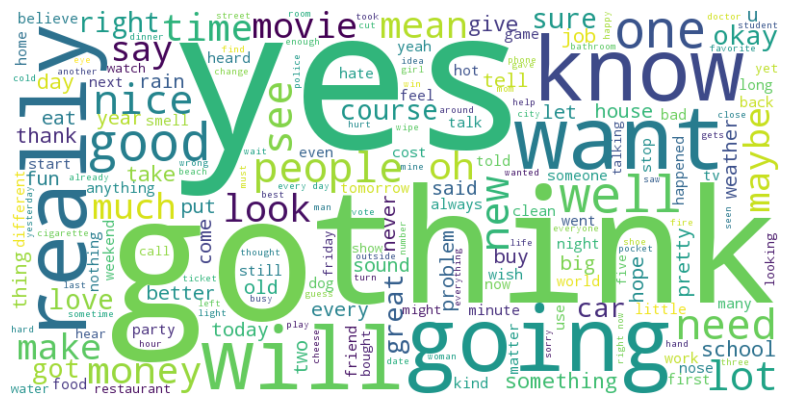

In [120]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = ' '.join(df['Questions'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

To further investigate the dataset, I created a bar chart to visualize word frequencies. This chart displays the top 20 most common words found in both user queries and chatbot responses, offering insights into the dominant themes of interactions.

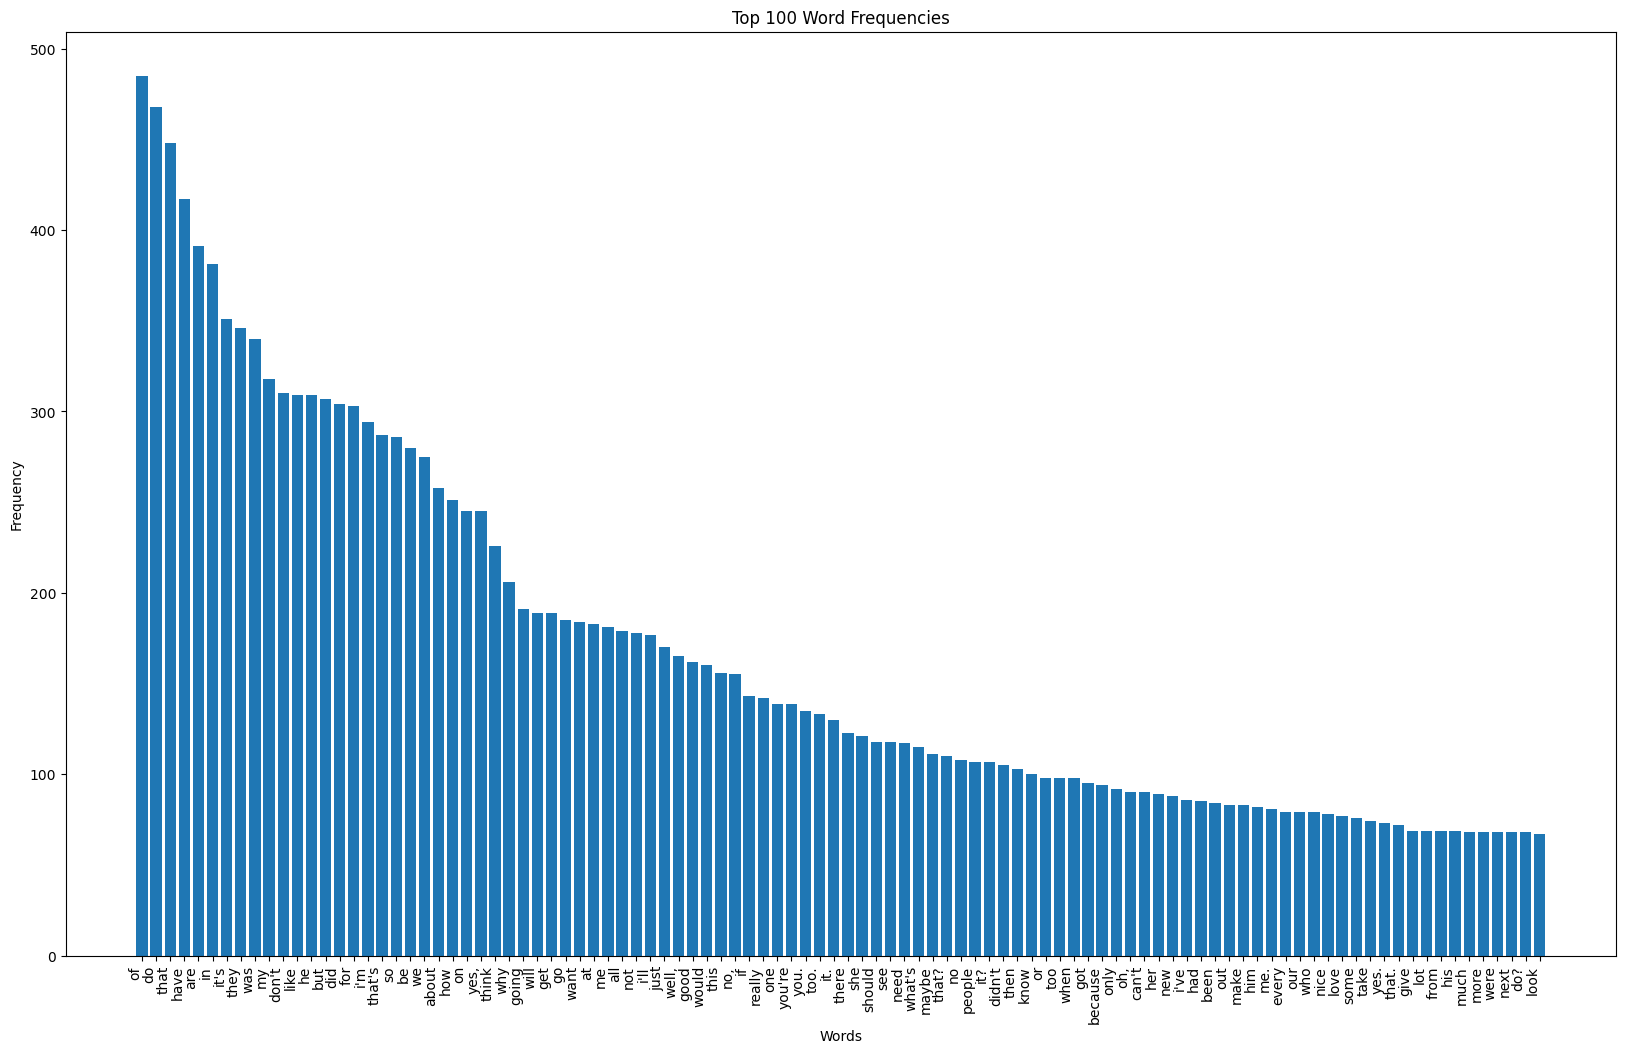

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


# Combine text from both columns into one
combined_text = " ".join(df['Questions']) + " " + " ".join(df['Answers'])

# Tokenization and word frequency calculation
words = combined_text.split()  # Tokenize text into words
word_counts = Counter(words)  # Calculate word frequencies

# Filter out common words (optional)
common_words = ["a", "an", "the", "and", "is", "it", "you", "I", "with", "your", "can","i","to","what"]
word_counts = {word: count for word, count in word_counts.items() if word not in common_words}

# Create a DataFrame from the word counts
word_count_df = pd.DataFrame(word_counts.items(), columns=["Word", "Frequency"])

# Sort the DataFrame by frequency (optional)
word_count_df = word_count_df.sort_values(by="Frequency", ascending=False)

# Create a bar chart
plt.figure(figsize=(20, 12))
plt.bar(word_count_df['Word'][:100], word_count_df['Frequency'][:100])  # Display the top 20 words
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 100 Word Frequencies')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for readability

plt.show()